<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/Testando_Obten%C3%A7%C3%A3o_de_Dados_do_IBOV_Extra%C3%A7%C3%A3o_beautifulsoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extração da Composição Atualizada do IBOV**

# 1. Testando o funcionamento atual da lib tradingcomdados

In [ ]:
!pip install tradingcomdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tradingcomdados: filename=tradingcomdados-1.1.0-py3-none-any.whl size=5310 sha256=e5fe3ffdfb82ab619c6d810f08f3e7d104847dfdf80969fc542aad5de6974852
  Stored in directory: /root/.cache/pip/wheels/9c/ab/4c/692cefcaee11edfd52f6a227f91295ccbbea161f2f6851af2a
Successfully built tradingcomdados


In [ ]:
from tradingcomdados import unsupervised_learning as ul

In [ ]:
import pandas as pd

In [ ]:
treino = pd.read_csv('train.csv')

In [ ]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
treino2 = treino.dropna()

In [86]:
treino2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [87]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)

In [90]:
cluster = ul.clustering_pipeline(km,treino2, id = 'PassengerId')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,KMeans(n_clusters=3)
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1


---------------------

Testes realizados no dia 19/06/2023

Obtenção de tickers B3

Obtenção de tickers IBOV

Rotina para extrair todos os dados do IBOV

A intenção deste código era obter de alguma forma todos os tickers listados na B3 e fazer a extração dos dados.

Vamos desenvolver uma funcionalidade para a biblitoeca.

In [ ]:
import yfinance as yf

In [ ]:
apple = yf.download('AAPL', start = '2019-01-01')

[*********************100%***********************]  1 of 1 completed


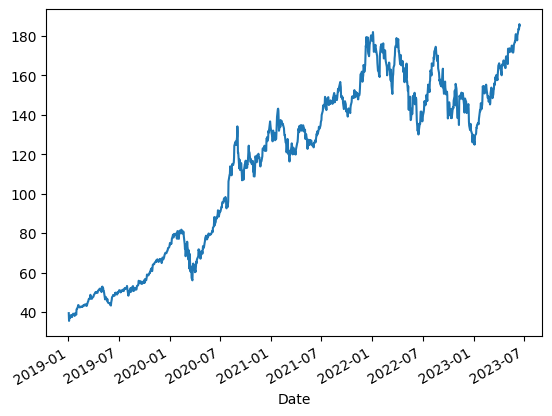

In [ ]:
apple.Close.plot();

In [ ]:
import pandas_datareader as pdr

# Define a fonte dos dados (Yahoo Finance)
data_source = 'yahoo'


In [ ]:
tickers = pdr.data.get_data_yahoo('^BVSP', start='2000-01-01')

TypeError: ignored

In [ ]:

# Imprime a lista de tickers
for ticker in tickers:
    print(ticker)

TypeError: ignored

In [ ]:
import yfinance as yf

# Obtém os dados de todas as ações brasileiras listadas no Yahoo Finance
br_stock_data = yf.Tickers('^BVSP').tickers

In [ ]:
br_stock_data

{'^BVSP': yfinance.Ticker object <^BVSP>}

In [ ]:
list(br_stock_data.)

TypeError: ignored

In [ ]:
[stock for stock in br_stock_data]

['^BVSP']

In [ ]:
list(yf.Tickers('^BVSP').tickers)

['^BVSP']

In [ ]:
# Obtém os dados de todas as ações brasileiras listadas no Yahoo Finance
br_stock_data = yf.Tickers('^BVSP').tickers

# Obtém os tickers das ações brasileiras
tickers = [stock.ticker for stock in br_stock_data]

# Imprime a lista de tickers
for ticker in tickers:
    print(ticker)

AttributeError: ignored

In [ ]:
import requests
from bs4 import BeautifulSoup

# Faz a requisição para a página de ações da B3
url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br'
response = requests.get(url)

# Extrai os tickers das ações
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'class': 'rgMasterTable'})
tickers = [row.find('td').text for row in table.findAll('tr')[1:]]

In [ ]:
tickers

Eliminar '\'' e '\n' das strings de dentro de uma lista

In [ ]:
tickers_limpos = [ticker.replace('\\', '').replace('\n', '') for ticker in tickers]

In [ ]:
IBOV = yf.download([i + '.SA' for i in tickers_limpos[1:]], start = '2023-01-01')['Adj Close']

[*********************100%***********************]  82 of 82 completed

10 Failed downloads:
- GNDI3.SA: No timezone found, symbol may be delisted
- BRDT3.SA: No timezone found, symbol may be delisted
- BRML3.SA: No timezone found, symbol may be delisted
- IGTA3.SA: No timezone found, symbol may be delisted
- BTOW3.SA: No timezone found, symbol may be delisted
- LCAM3.SA: No timezone found, symbol may be delisted
- HGTX3.SA: No timezone found, symbol may be delisted
- VVAR3.SA: No timezone found, symbol may be delisted
- LAME4.SA: No timezone found, symbol may be delisted
- SULA11.SA: No timezone found, symbol may be delisted


In [92]:
import requests
from bs4 import BeautifulSoup

# Faz a requisição para a página de ações da B3
url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br'
response = requests.get(url)

# Extrai os tickers das ações
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', {'class': 'rgMasterTable'})
tickers = [row.find('td').text for row in table.findAll('tr')[1:]]

In [ ]:
import requests
import pandas as pd

# Faz a requisição para a página de ações da B3
url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br'
response = requests.get(url)

# Extrai a tabela de ações e suas participações
table = pd.read_html(response.text, attrs={'class': 'rgMasterTable'})[0]

table

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,ABEV3,AMBEV S/A,ON,4.355.174.839,2953
1,ASAI3,ASSAI,ON NM,157.635.935,554
2,AZUL4,AZUL,PN N2,327.283.207,645
3,B3SA3,B3,ON NM,1.930.877.944,5167
4,BBAS3,BRASIL,ON ERJ NM,1.283.197.221,1760
...,...,...,...,...,...
78,VIVT3,TELEF BRASIL,ON EJ,444.219.852,947
79,VVAR3,VIAVAREJO,ON NM,1.595.083.594,951
80,WEGE3,WEG,ON ED NM,741.148.001,2847
81,YDUQ3,YDUQS PART,ON NM,300.483.575,426


In [106]:
import requests
import pandas as pd

# Faz a requisição para a página de ações da B3
url = 'https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm'
#url = 'https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br'

response = requests.get(url)

pd.read_html(response.text, attrs={'class': 'rgMasterTable'})[0]

ValueError: ignored

In [102]:
soup = BeautifulSoup(response.text, 'html.parser')

In [103]:
table = soup.find('table', {'class': 'rgMasterTable'})

In [104]:
table

In [101]:


tickers = [row.find('td').text for row in table.findAll('tr')[1:]]

AttributeError: ignored

In [100]:
response.text

'<!doctype html>\r\n<html lang="en">\r\n\r\n<head>\r\n  <meta charset="utf-8">\r\n  <title>Ã\x8dndices</title>\r\n  <base href="/indexPage/">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\r\n  <script type="text/javascript" src="/indexPage/ruxitagentjs_ICA2NVfgjqru_10265230425083909.js" data-dtconfig="rid=RID_89657381|rpid=-131564868|domain=b3.com.br|reportUrl=/indexPage/rb_ea8d7b8f-040c-423b-b726-54310cab2c40|app=2fa0c7805985f6bf|featureHash=ICA2NVfgjqru|vcv=2|rdnt=1|uxrgce=1|bp=3|cuc=kju5m9kg|mel=100000|dpvc=1|ssv=4|lastModification=1686987512142|dtVersion=10265230425083909|tp=500,50,0,1|agentUri=/indexPage/ruxitagentjs_ICA2NVfgjqru_10265230425083909.js"></script><link rel="icon" type="image/x-icon" href="favicon.ico">\r\n  <!-- Global site tag (gtag.js) - Google Analytics -->\r\n  <script async src="https://www.googletagmanager.com/gtag/js?id=UA-94042116-5"></script>\r\n  <script>\r\n    window.dataLayer = window.dataLayer || [];\r\n    function gtag() { da

In [ ]:
# ERRO DO CHAT GPT

# Remove a última coluna (Variação)
#table = table.iloc[:, :-1]


In [ ]:
# Define os nomes das colunas
table.columns = ['Código', 'Ação', 'Tipo', 'Qtde. Teórica', 'Part. (%)']

# Remove as linhas de cabeçalho e de rodapé
table = table.iloc[1:-2]

# Define o código das ações como índice
table.set_index('Código', inplace=True)

table

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
ASAI3,ASSAI,ON NM,157.635.935,554
AZUL4,AZUL,PN N2,327.283.207,645
B3SA3,B3,ON NM,1.930.877.944,5167
BBAS3,BRASIL,ON ERJ NM,1.283.197.221,1760
BBDC3,BRADESCO,ON EJ N1,1.147.260.246,1125
...,...,...,...,...
USIM5,USIMINAS,PNA N1,513.729.947,426
VALE3,VALE,ON NM,2.837.320.141,13770
VIVT3,TELEF BRASIL,ON EJ,444.219.852,947
